In [53]:
"You are the manager of the Advertising division of your company, and your boss asks you the question,"
"How much more sales will we have if we invest $1000 dollars in TV advertising?"
"The goal of this exercise is to estimate the Sales with a 95% confidence interval using the "
"Advertising.csv dataset."

'Advertising.csv dataset.'

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy import stats

In [55]:
df = pd.read_csv('Advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [56]:
# This helper function computes the variance of the error term 

def error_func(y,y_p):
    n = len(y)
    return np.sqrt(np.sum((y-y_p)**2/(n-2)))

In [57]:
# select the number of bootstraps 

numboot = 1000

# Set the budget amount of $1000. We have used a 2d list to facilitate model prediction (sklearn.LinearRegression requires input as a 2d array)
budget = [[1000]]

# Define an empty list that will store sales predictions for each bootstrap
sales_dist = []

In [58]:
# Running through each bootstrap, we fit a model, 
# make predictions and compute sales which is appended 
# to the list defined above

for i in range(numboot):
    # Bootstrap using df.sample method.
    df_new = df.sample(frac=1, replace=True)
    x = df_new[['TV']].values
    y = df_new['Sales'].values
    linreg = LinearRegression()
    linreg.fit(x,y)
    prediction = linreg.predict(budget)[0]
    y_pred = linreg.predict(x) 
    error = np.random.normal(0,error_func(y,y_pred))
    # The final sales prediction is the sum of the model prediction and the error term
    sales = prediction + error
    sales_dist.append(sales)

In [59]:
### edTest(test_sales) ###
# We sort the list containing sales predictions in ascending values 

sales_dist.sort()

# find the 95% confidence interval using np.percentile function at 2.5% and 97.5%

sales_CI = (np.percentile(sales_dist, 2.5),np.percentile(sales_dist, 97.5))

In [60]:
# Use this helper function to plot the histogram of beta values along with the 95% confidence interval

def plot_simulation(simulation,confidence):
    plt.hist(simulation, bins = 30, label = 'beta distribution', align = 'left', density = True,edgecolor='k')
    plt.axvline(confidence[1], 0, 1, color = 'r', label = 'Right Interval')
    plt.axvline(confidence[0], 0, 1, color = 'red', label = 'Left Interval')
    plt.xlabel('Beta value')
    plt.ylabel('Frequency')
    plt.legend(frameon = False, loc = 'upper right')

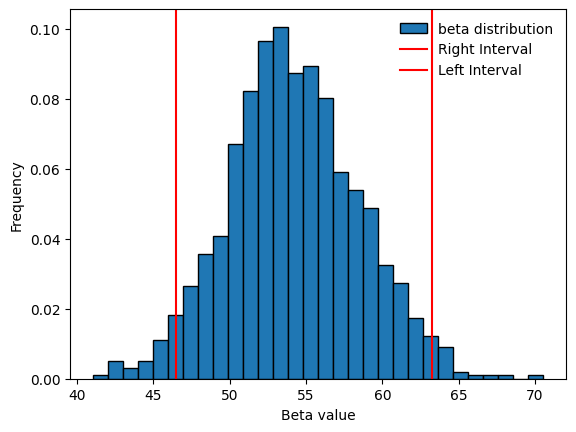

In [61]:
# call the function above with the computed sales distribution and the confidence intervals from earlier

plot_simulation(sales_dist,sales_CI)

In [62]:
# Print the computed values

print(f"With a TV advertising budget of ${budget[0][0]},")
print(f"we can expect an increase of sales anywhere between {sales_CI[0]:0.2f} to {sales_CI[1]:.2f}\
 with a 95% confidence interval")

With a TV advertising budget of $1000,
we can expect an increase of sales anywhere between 46.46 to 63.25 with a 95% confidence interval
